Name - Ishita Sharma
CWID - 50224923

I am here try to to do featuure selection 
In one of the notebook I am applying the various algorithms on the model


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,f1_score
from pandas.plotting import scatter_matrix
from scipy import stats
import numpy as np


In [21]:
#loading the data
df = pd.read_csv("Breast_cancer_data.csv",header = 0)
df = df.replace({'B':0,'M':1})
df = df.dropna(axis = 1)
print(df)
print(df.head())
print()
print()
print(df.tail())

print(df.columns)

           id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1       17.990         10.38          122.80   
1      842517          1       20.570         17.77          132.90   
2    84300903          1       19.690         21.25          130.00   
3    84348301          1       11.420         20.38           77.58   
4    84358402          1       20.290         14.34          135.10   
5      843786          1       12.450         15.70           82.57   
6      844359          1       18.250         19.98          119.60   
7    84458202          1       13.710         20.83           90.20   
8      844981          1       13.000         21.82           87.50   
9    84501001          1       12.460         24.04           83.97   
10     845636          1       16.020         23.24          102.70   
11   84610002          1       15.780         17.89          103.60   
12     846226          1       19.170         24.80          132.40   
13    

In [22]:
#here also like in all other notebooks we will split the independent and dependent features
y = df.diagnosis
list = ['id','diagnosis']
x = df.drop(list,axis = 1)


In the below I am heading towards my feature selection 
So I am dropping some of the features in the list since they are correlated to each other so I can generally choose any of them because choosing the specific ones will be or will not be a good feature
It all depends on the how much accuracy we can get while using some of the features with the classifiers algorithms.
I am here using the Random Forest Classifier which is among the best ensemble method

In [23]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
df_1 = x.drop(drop_list1,axis = 1 ) 
df_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [24]:
#here I am checking the correlation in numbers as well as visually using the seaborn heatmap which one of the oldest and 
#good method to visually see the correlation between the features

#correlation
df_1_corr = df_1.corr()
print(df_1_corr.head())

                 texture_mean  area_mean  smoothness_mean  concavity_mean  \
texture_mean         1.000000   0.321086        -0.023389        0.302418   
area_mean            0.321086   1.000000         0.177028        0.685983   
smoothness_mean     -0.023389   0.177028         1.000000        0.521984   
concavity_mean       0.302418   0.685983         0.521984        1.000000   
symmetry_mean        0.071401   0.151293         0.557775        0.500667   

                 symmetry_mean  fractal_dimension_mean  texture_se   area_se  \
texture_mean          0.071401               -0.076437    0.386358  0.259845   
area_mean             0.151293               -0.283110   -0.066280  0.800086   
smoothness_mean       0.557775                0.584792    0.068406  0.246552   
concavity_mean        0.500667                0.336783    0.076218  0.617427   
symmetry_mean         1.000000                0.479921    0.128053  0.223970   

                 smoothness_se  concavity_se  symmetry_s

<Figure size 720x720 with 0 Axes>

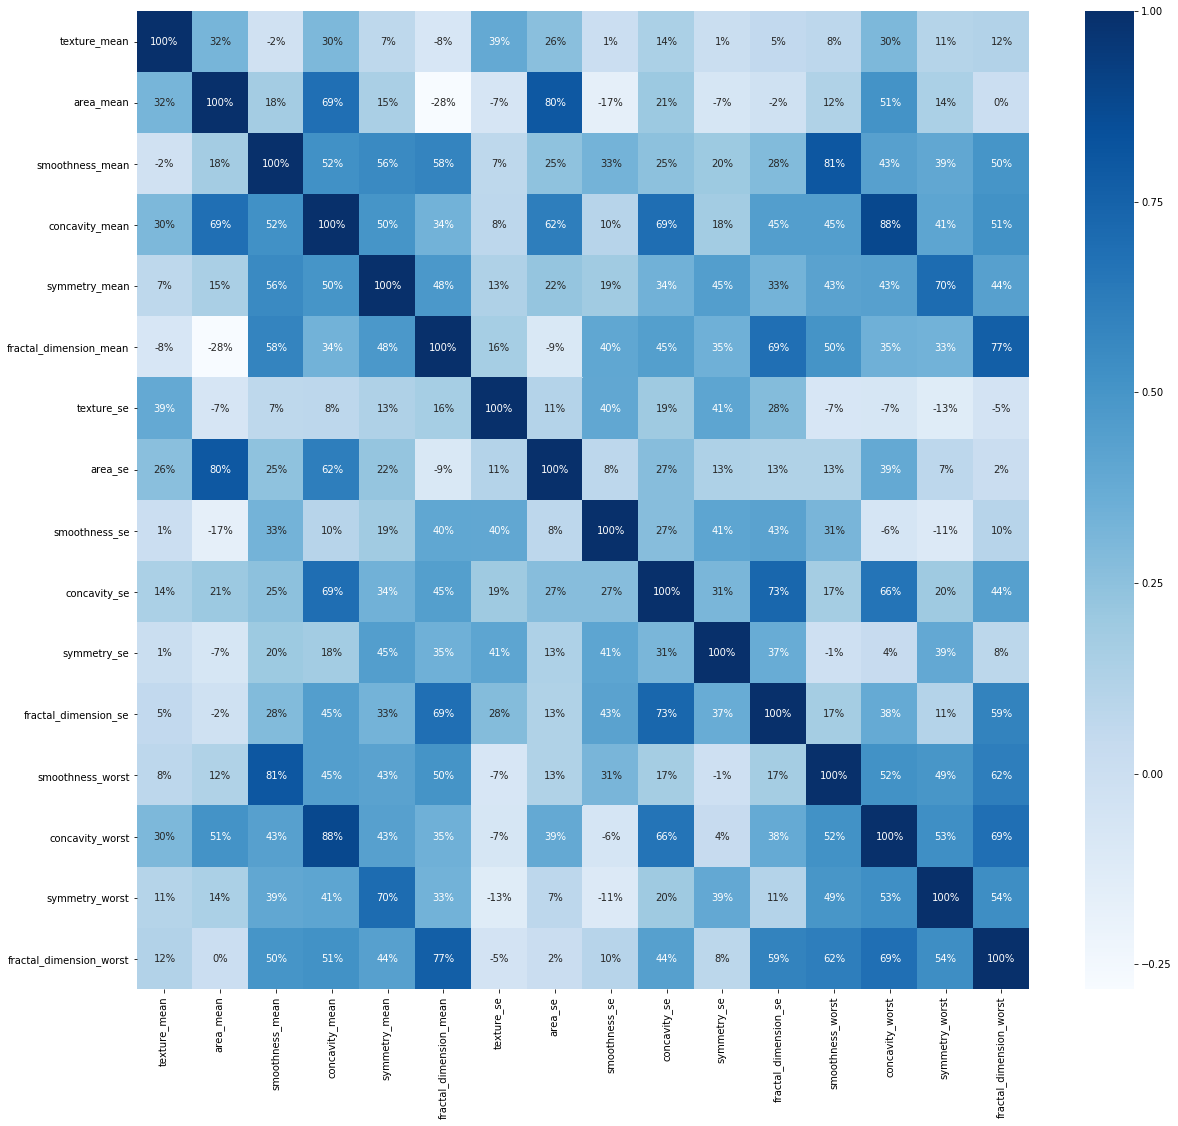

In [25]:
#visually show thr correlation
plt.figure(figsize = (10,10))
plt.figure(figsize=(20,18))
sns.heatmap(df_1_corr,cmap = 'Blues',annot=True,fmt = '.0%') 
#so here after dropping the columns(features more precisely) I can see that there is 90% or more correlartion between the 
# the features except the diagonals which are always by default

Accuracy is:  0.9415204678362573


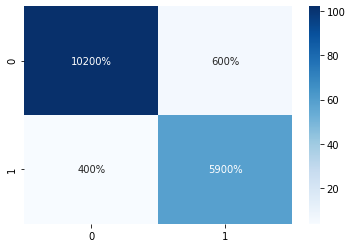

In [39]:
#Now here I will use Random Classifier as a alogrithms to test the accuracy if the feature selected are good or not

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(df_1, y, test_size=0.3, random_state=0)

#random forest classifier
Feature_rf = RandomForestClassifier(random_state=43,n_estimators = 100)      
Feature_rf = Feature_rf.fit(x_train,y_train)

score = accuracy_score(y_test,Feature_rf.predict(x_test))
print('Accuracy is: ',score)
cm = confusion_matrix(y_test,Feature_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt=".0%",cmap = 'Blues')


Similarily we can check with the other features and come to a conclusion after calculating their score(accuracy)
whether they are good features for prediction or not.
With this I have completed my data analysis project as of now. But at the same page I want to build the recommendation system based on the same data. But trying to combine it with the other related to cure data.